# Data Science workflow  

In this sequence of notebooks we will exemplify the inner steps in the Data Science workflow.  
We are not going to discuss the business requirements and deployment strategies, but just the phases below:

### I - Exploratory Data Analysis (this notebook)  
##### II - Feature Engineering and Selection 
##### III - Modeling  
##### IV - Evaluation  

This notebook will cover the Exploratory Data Analysis (EDA)

## I - Exploratory Data Analysis  

Exploratory Data Analysis is a set of techniques developed by John Wilder Tukey in 1970. The philosophy behind this approach was to examine the data before building a model.  
John Tukey encouraged statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.  

Today data scientists and analysts spend most of their time in Data Wrangling and Exploratory Data Analysis also known as EDA. But what is this EDA and why is it so important? 
Exploratory Data Analysis (EDA) is a step in the data science workflow, where a number of techniques are used to better understand the dataset being used.

‘Understanding the dataset’ can refer to a number of things including but not limited to…

+ Get maximum insights from a data set
+ Uncover underlying structure
+ Extracting important variables and leaving behind useless variables
+ Identifying outliers, anomalies, missing values, or human error
+ Understanding the relationship(s), or lack thereof, between variables
+ Testing underlying assumptions
+ Ultimately, maximizing your insights in a dataset and minimizing potential error that may occur later in the process

##### Let's see how exploratory data analysis is regarded in CRISP-DM and CRISP-ML:

## CRISP-DM

The CRoss Industry Standard Process for Data Mining ([CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/)) is a process model that serves as the base for a data science process.  
It has six sequential phases:

+ Business understanding – What does the business need?
+ Data understanding – What data do we have / need? Is it clean?
+ Data preparation – How do we organize the data for modeling?
+ Modeling – What modeling techniques should we apply?
+ Evaluation – Which model best meets the business objectives?
+ Deployment – How do stakeholders access the results?


![CRISP-DM Process](https://miro.medium.com/max/736/1*0-mnwXXLlMB_bEQwp-706Q.png)

The machine learning community is still trying to establish a standard process model for machine learning development. As a result, many machine learning and data science projects are still not well organized. Results are not reproducible.  
In general, such projects are conducted in an ad-hoc manner. To guide ML practitioners through the development life cycle, the Cross-Industry Standard Process for the development of Machine Learning applications with Quality assurance methodology ([CRISP-ML(Q)](https://ml-ops.org/content/crisp-ml)) was recently proposed.  

There is a particular order of the individual stages. Still, machine learning workflows are fundamentally iterative and exploratory so that depending on the results from the later phases we might re-examine earlier steps.

## CRISP-ML

![CRISP-ML Process](https://ml-ops.org/img/crisp-ml-process.jpg)  
[Source](https://ml-ops.org/content/crisp-ml)

If we explode the EDA phase in each of the previous frameworks, we would have something like this:

![EDA](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process_W640.jpg)  
[Source](https://www.researchgate.net/publication/329930775_A_comprehensive_review_of_tools_for_exploratory_analysis_of_tabular_industrial_datasets)

### Starting the EDA

### 1. Import libraries

In [1]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 21.2 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e
import pandas as pd

### 2. Load Dataset and distinguish attributes

##### 2.1 - Visually inspecting the dataset

In [3]:
df = pd.read_csv('../../../Data/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##### 2.2 - Checking columns and data types

In [4]:
# df.columns
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##### 2.3 - Checking basic statistics - first insight on distributions

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


##### At this moment, you look for columns that shall be transformed/converted later in the workflow.

In [6]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')
Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')
Index([], dtype='object')


### 3. Check for missing values

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

It seems there are no missing values, but that may be misleading. Let's explore a bit more:

In [8]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' '?']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

There are null values in our dataset in form of ‘?’. Pandas is not recognizing them so we will replace them with [`np.nan`](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

In [9]:
#for col in df.columns:
#    df[col].replace({'?': np.nan},inplace=True)

df.replace({'?': np.nan},inplace=True)    # works better and faster in this specific case, avoiding the loop.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### 3.1 Visualizing the missing values  
Now the missing values are identified in the dataframe.
With the help of [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html), we can see the amount of data that is missing from the attribute.
With this we can make decisions whether to drop these missing values or to replace them.
Usually dropping the missing values is not advisable but sometimes it may be helpful.

<Axes: >

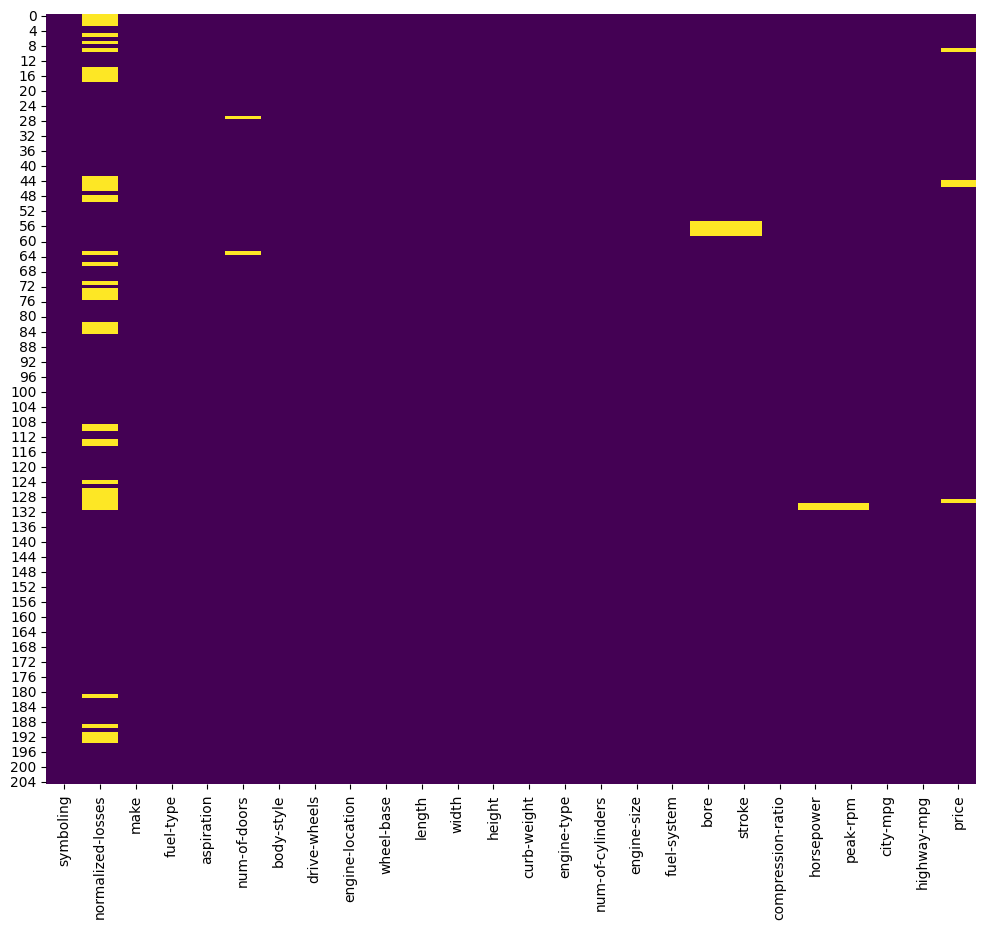

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

Now observe that there are many missing values in 'normalized_losses' while other columns have fewer missing values. We can’t drop the 'normalized_losses' column as it may be important for our prediction.  
We can also use the [**missingno**](https://github.com/ResidentMario/missingno) libray for a better evaluation of the missing values. First we can check the quantity and how they distribute among the rows:

In [12]:
import missingno as msno

<Axes: >

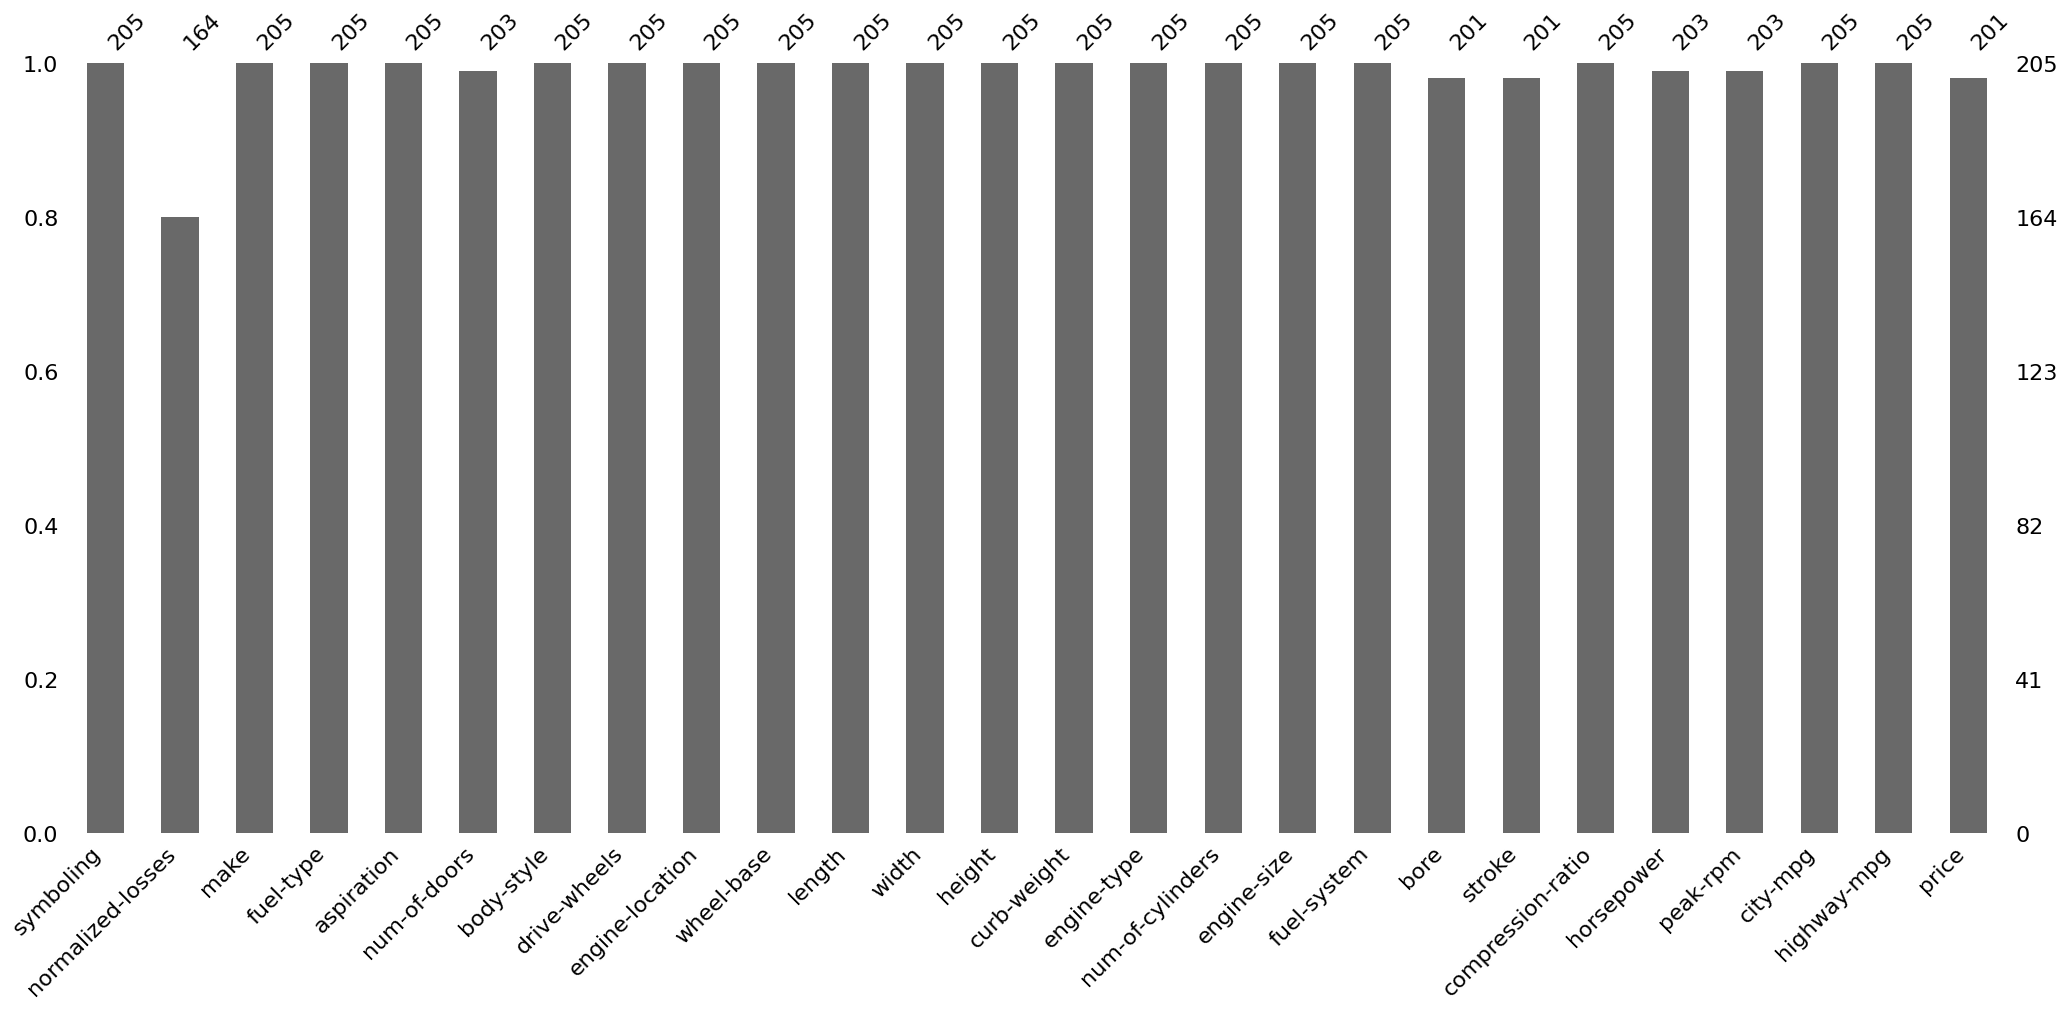

In [13]:
msno.bar(df)

<Axes: >

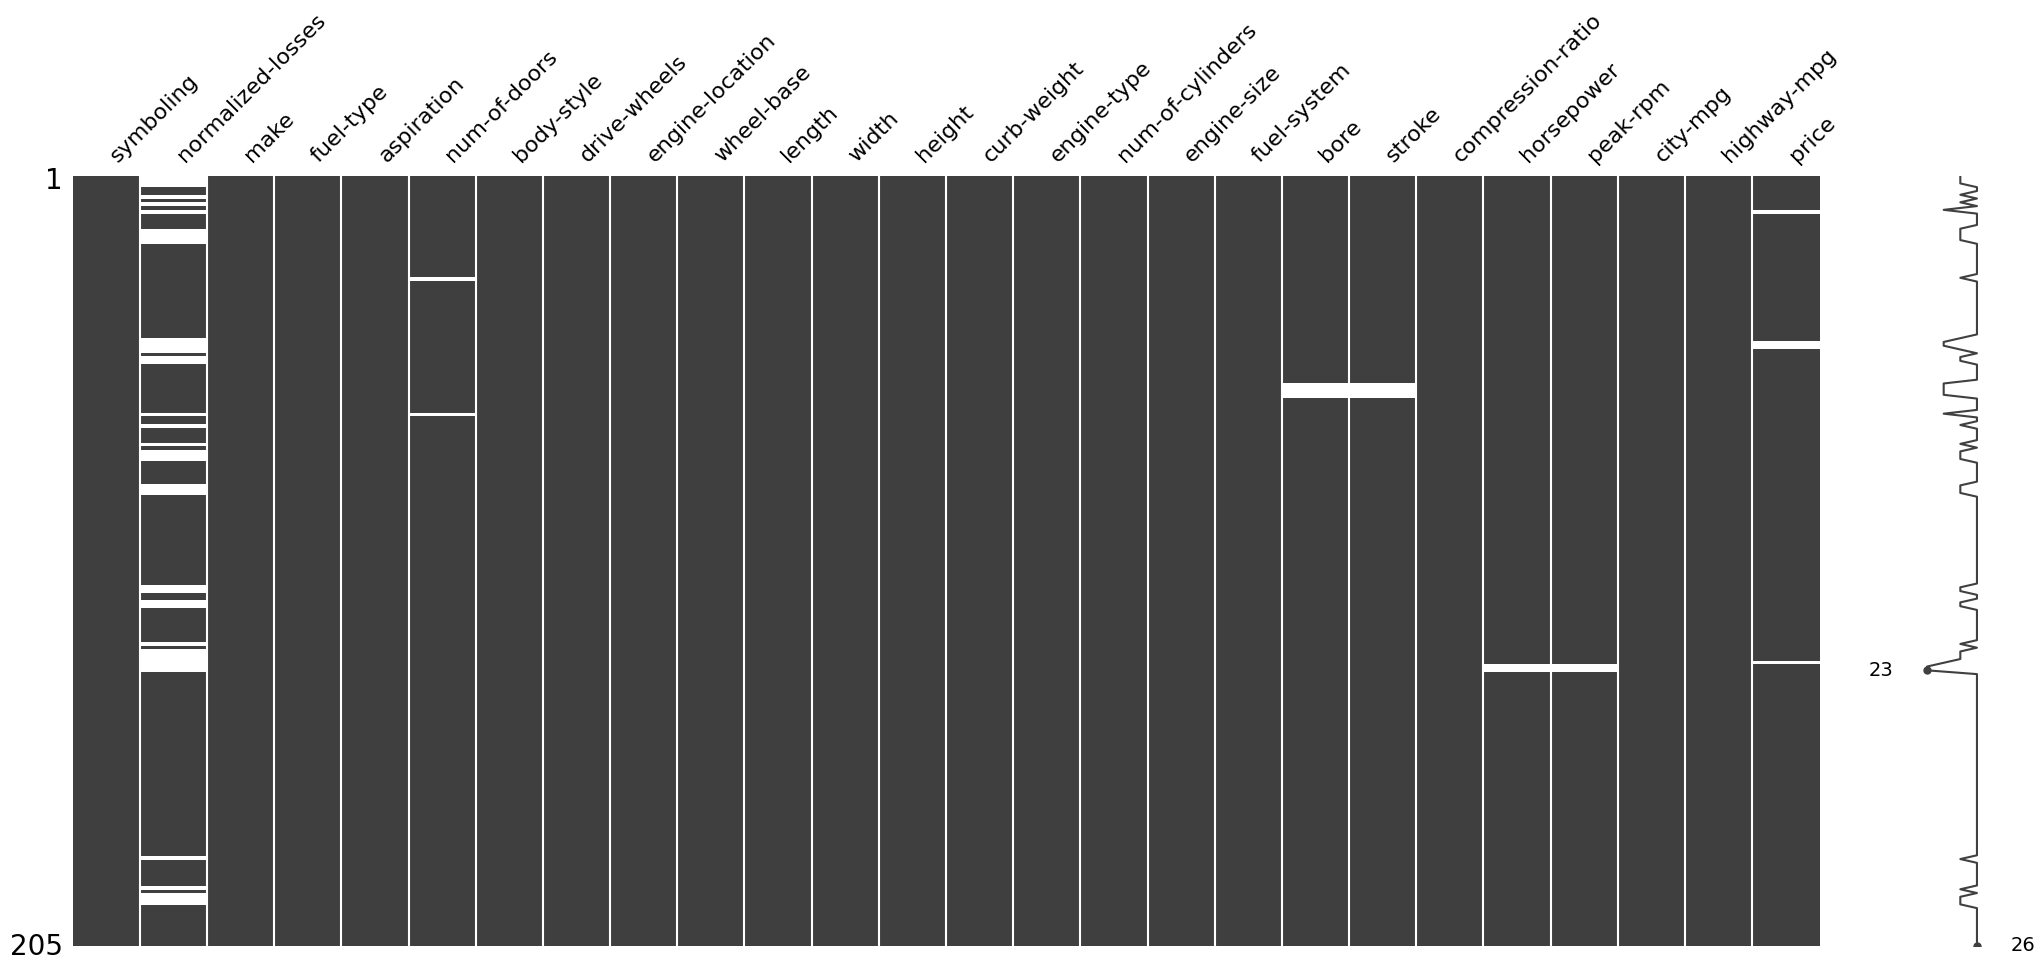

In [14]:
msno.matrix(df)

The missingno [correlation heatmap](https://github.com/ResidentMario/missingno?tab=readme-ov-file#heatmap) measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

<Axes: >

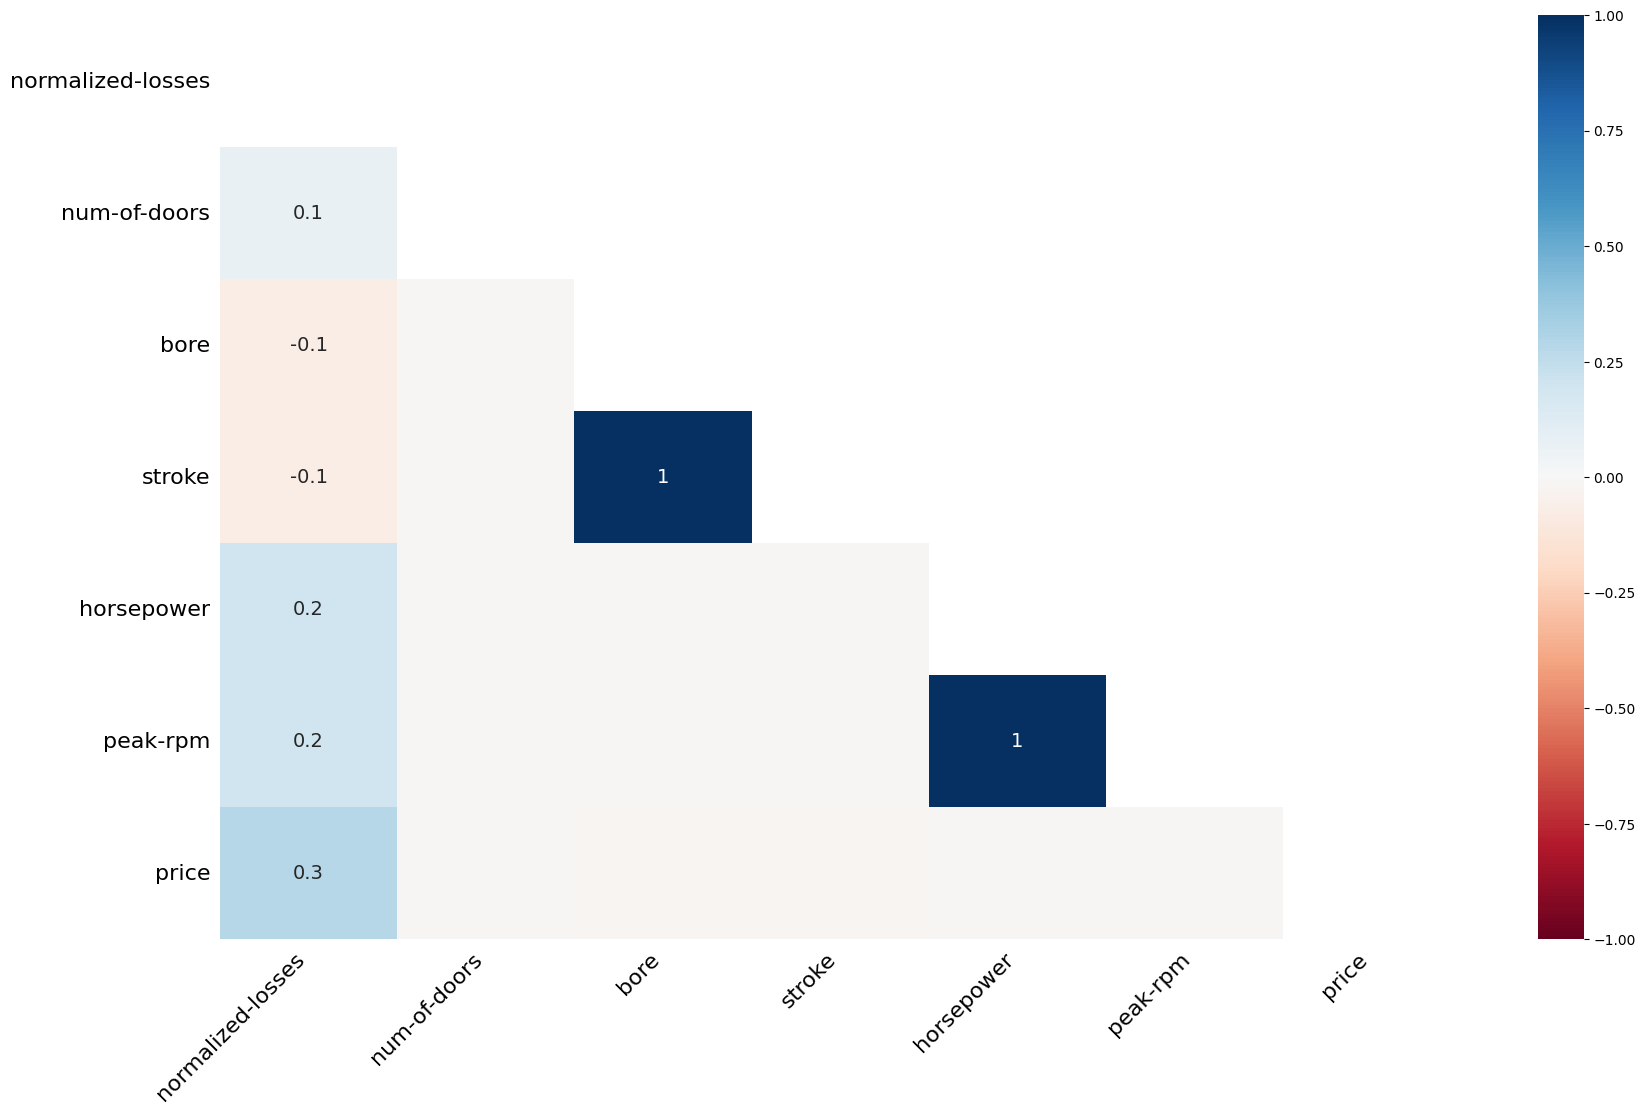

In [15]:
msno.heatmap(df)

The [dendrogram](https://github.com/ResidentMario/missingno?tab=readme-ov-file#dendrogram) allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

<Axes: >

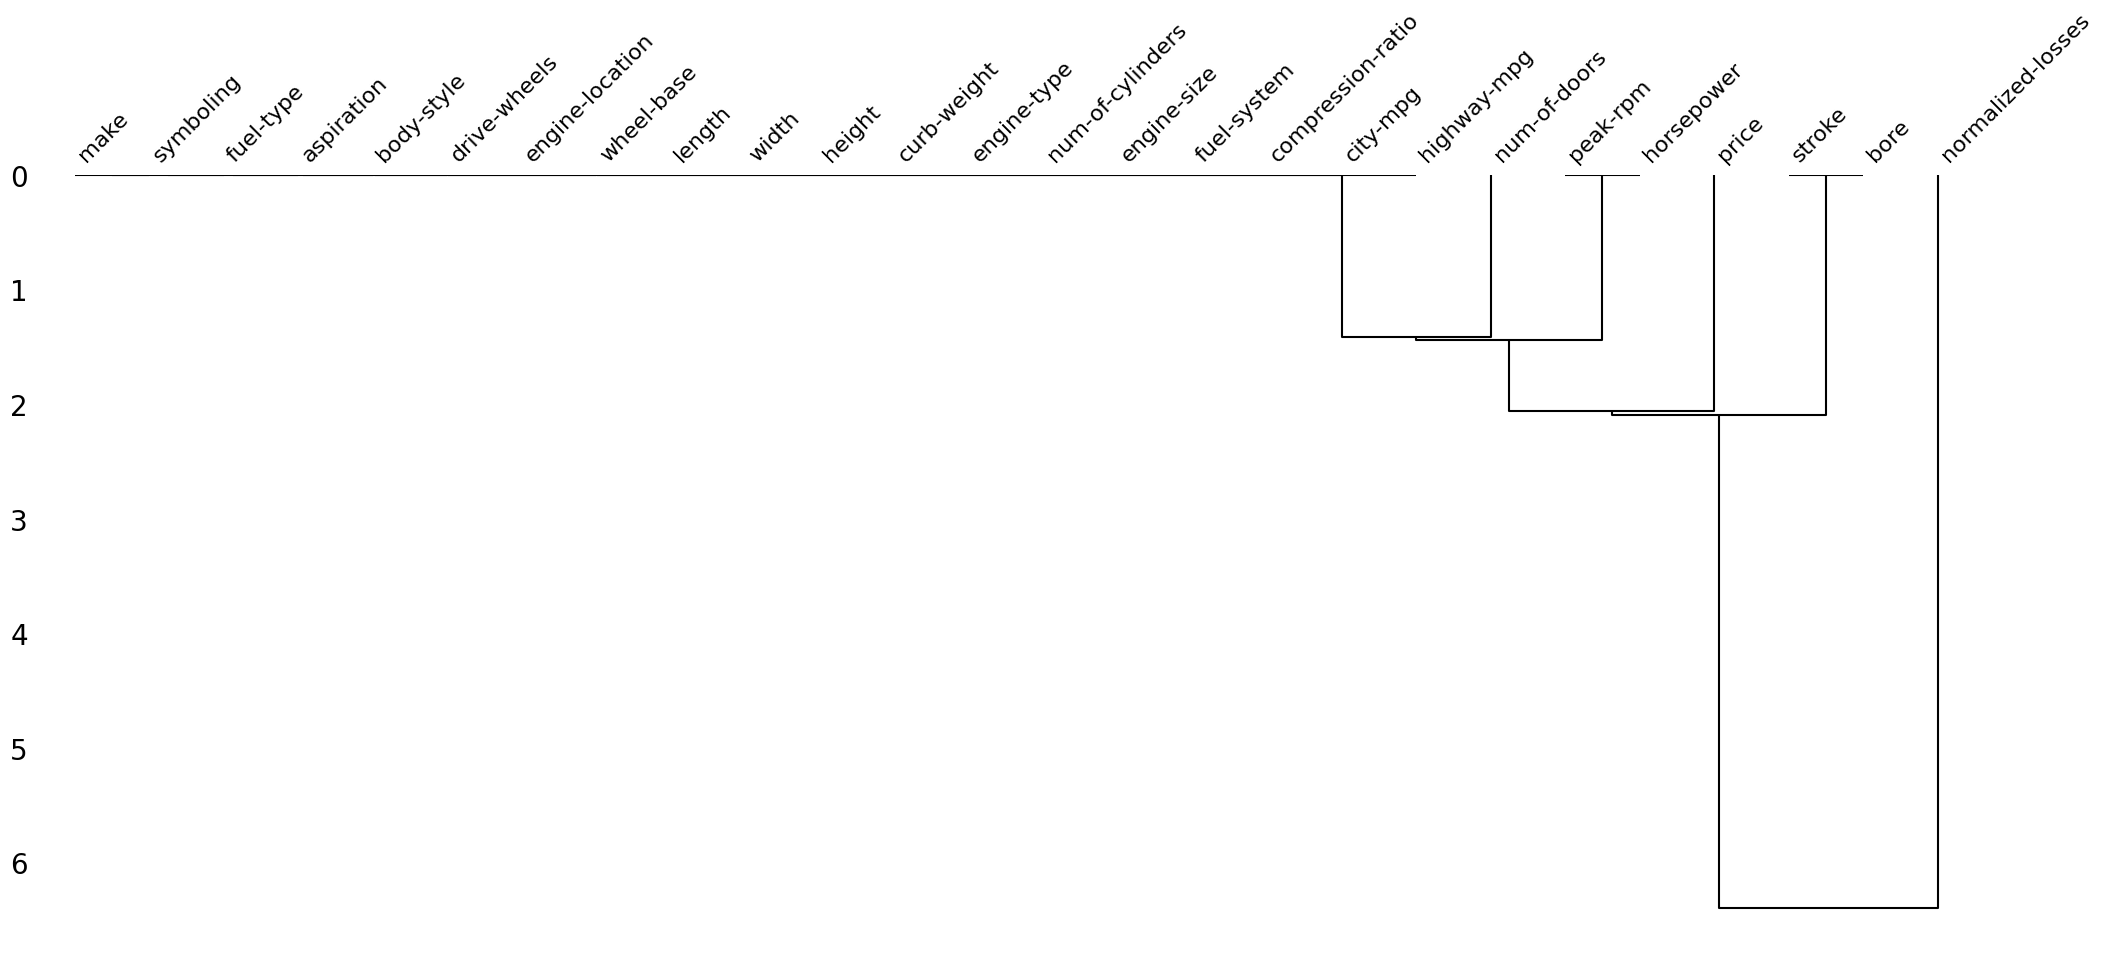

In [16]:
msno.dendrogram(df)

#### 3.2. Replacing the missing values
We will be replacing these missing values with mean because the number of missing values is not great (we could have used the median too).  
Later, in the data preparation phase, we will learn other imputation techniques.

In [17]:
df.select_dtypes(include='number').head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [18]:
df.select_dtypes(include='object').head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450


Now let's transform the mistaken datatypes for numeric values and fill with the mean, using the strategy we have chosen.

In [19]:
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in num_col:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

/tmp/ipykernel_304692/3246544556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 4. Checking Data Distributions

This is the most important step in EDA. 
- This step will decide how much insight you can get.
- Checking the distributions is fundamental for feature selection and the modeling phase
- This step varies from person to person in terms of their questioning ability. 

Let's check the univariate and bivariate distributions and correlation between different variables, this will give us a roadmap on how to proceed further.

#### 4.1 Univariate Analysis  

The goal here is to check the distribution of numeric and categorical variables (more about this later in the course)  
We can quickly check the distributions of every numeric column:

In [20]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

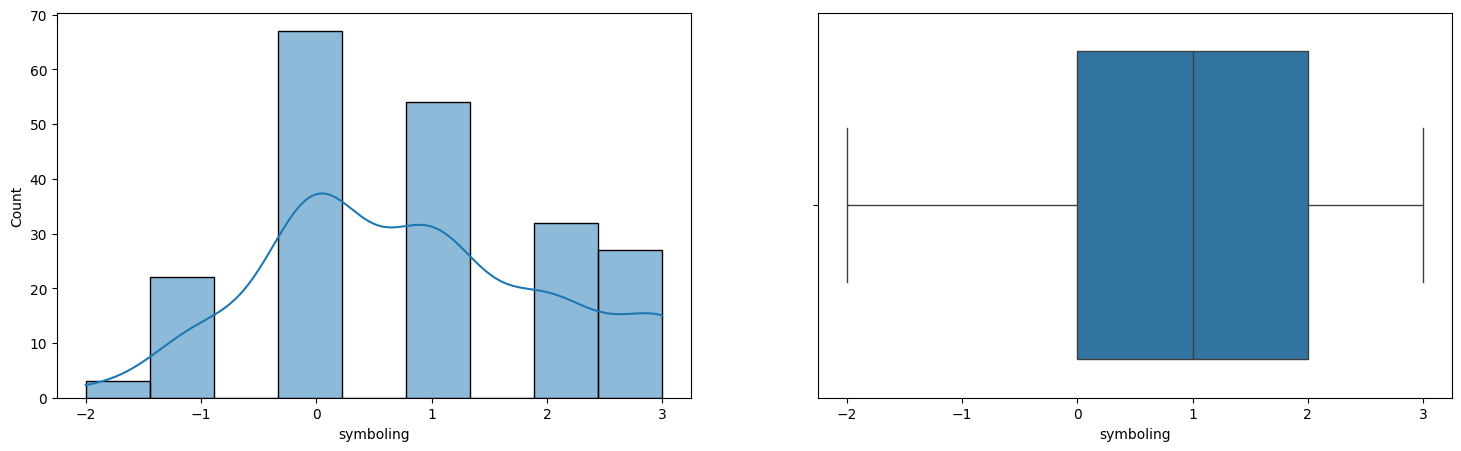

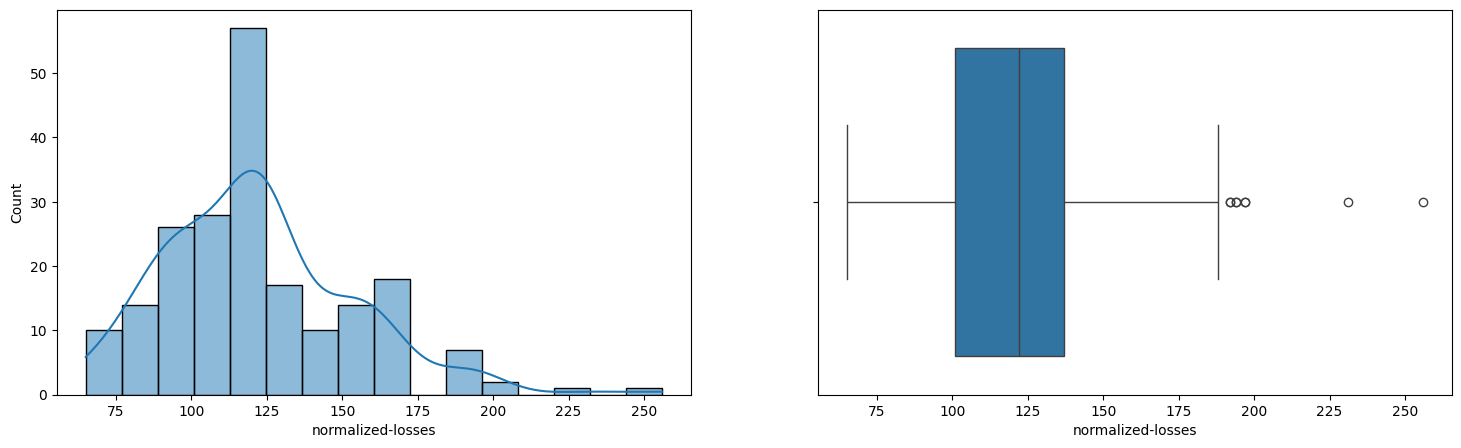

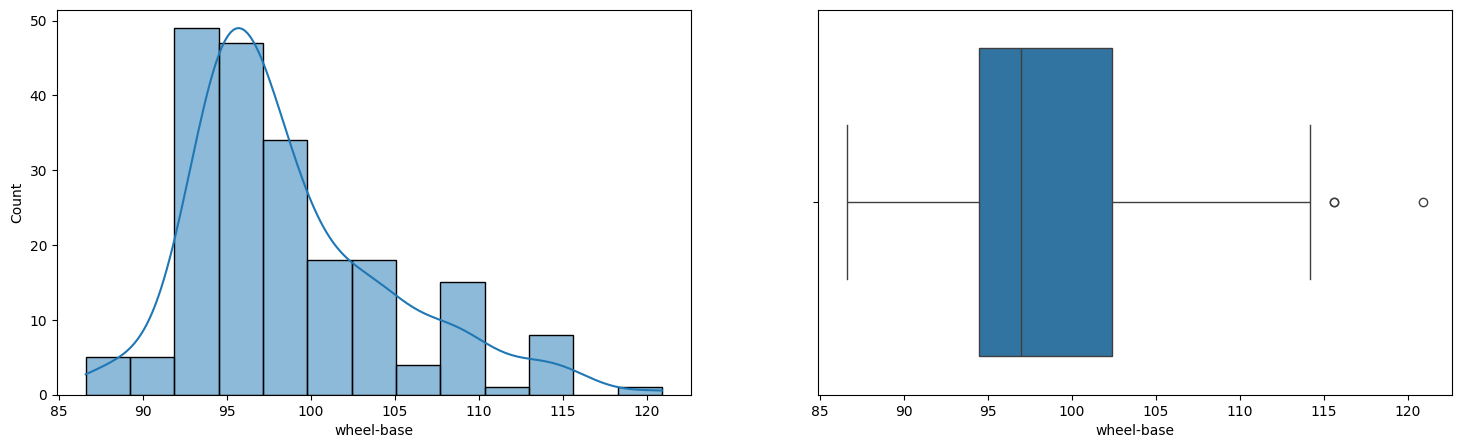

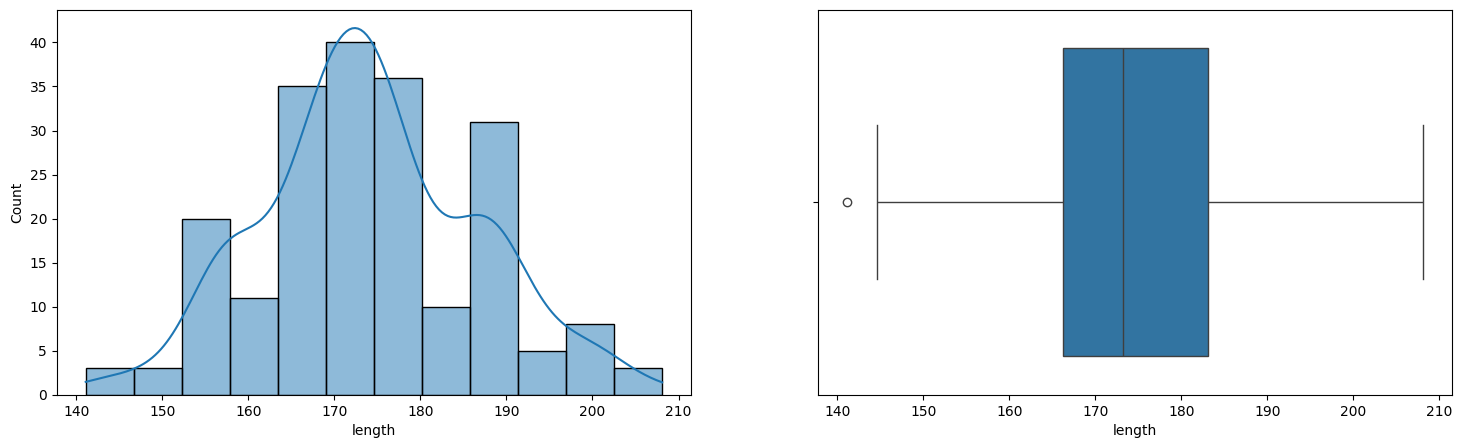

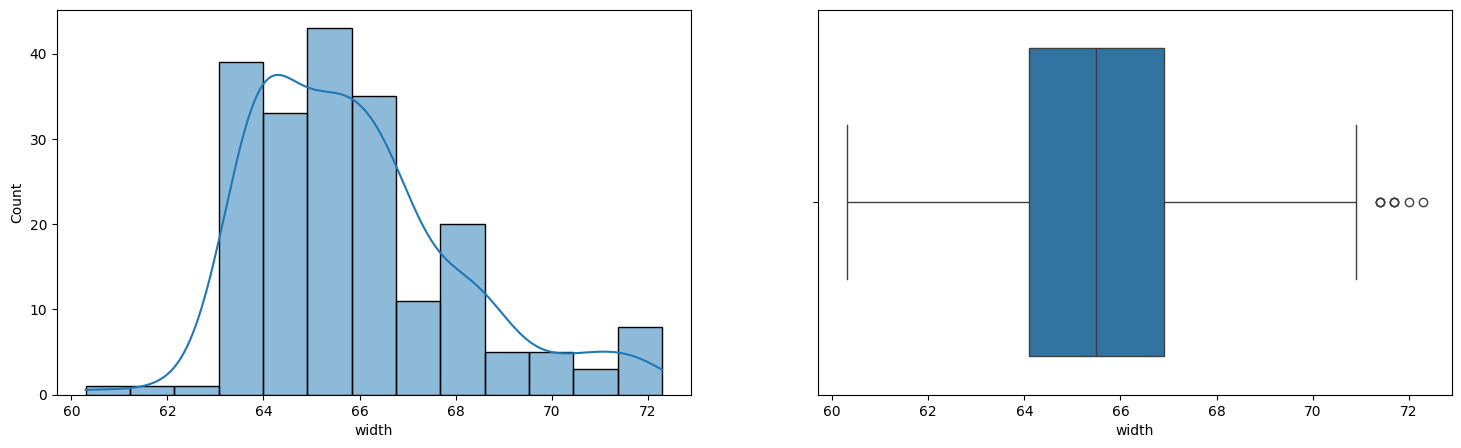

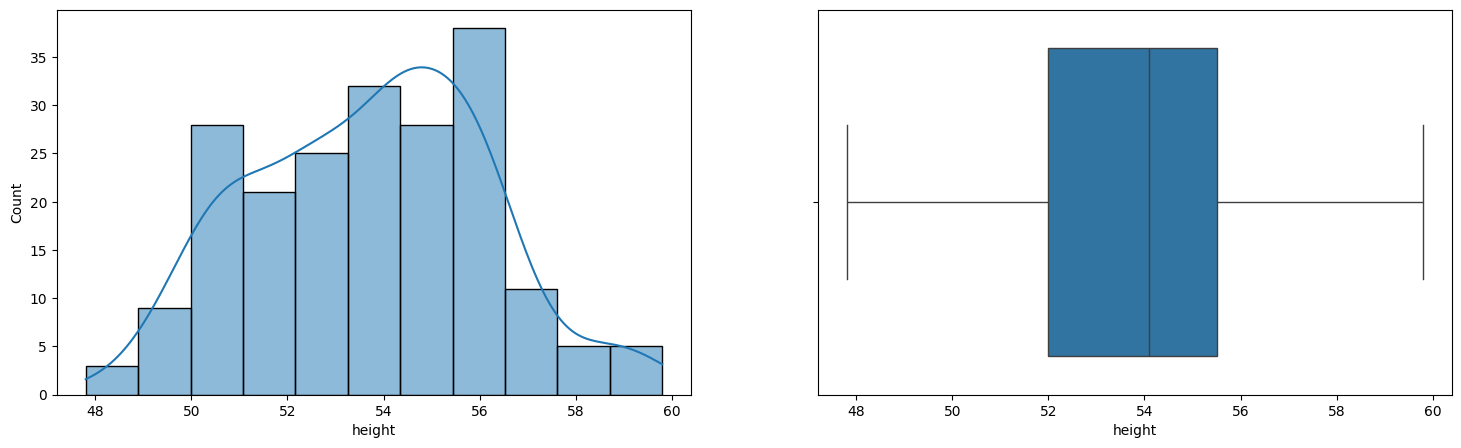

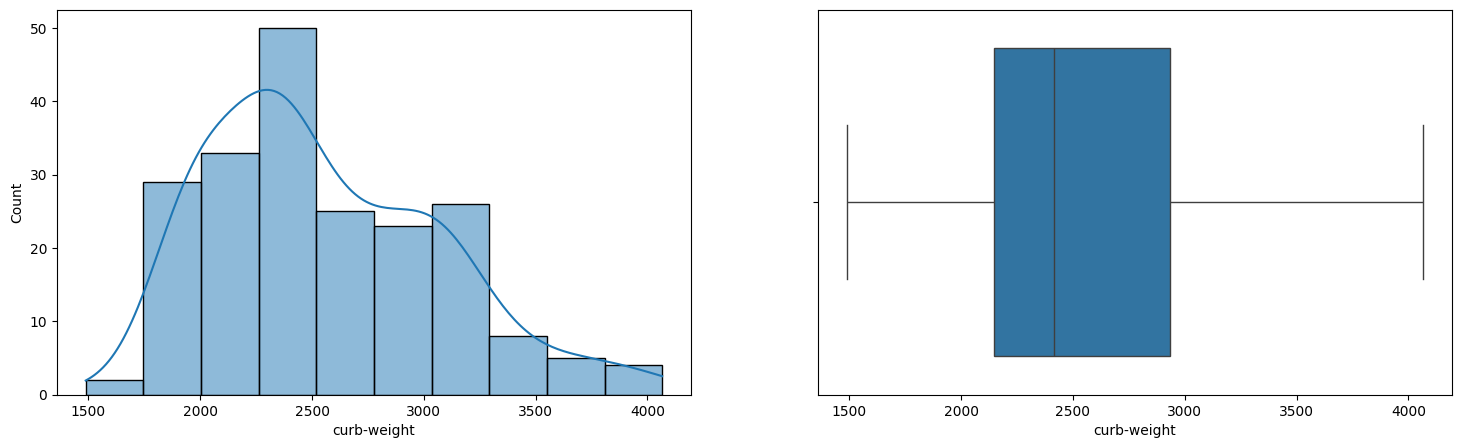

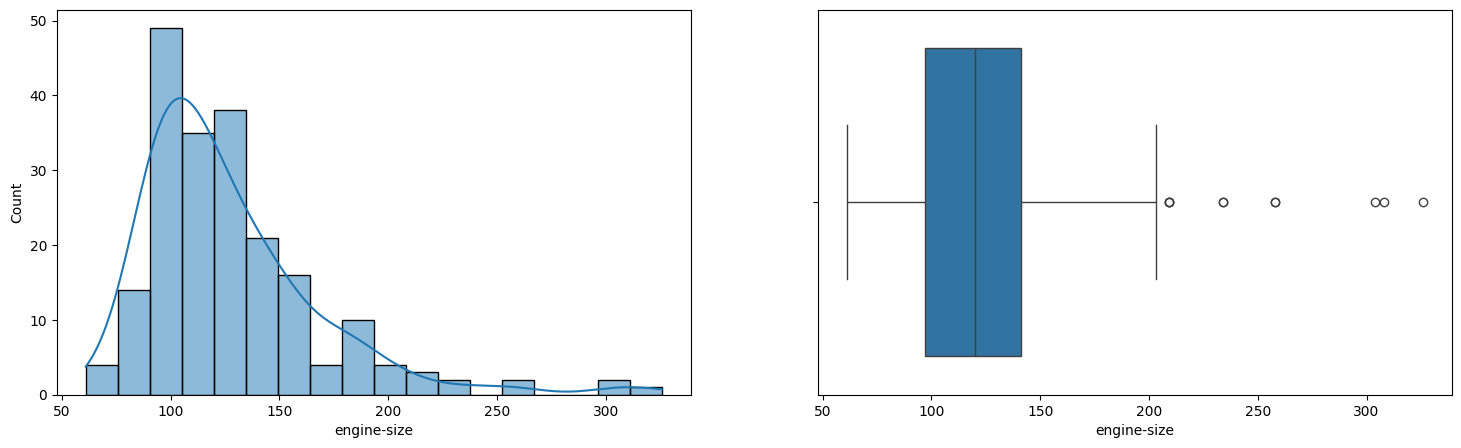

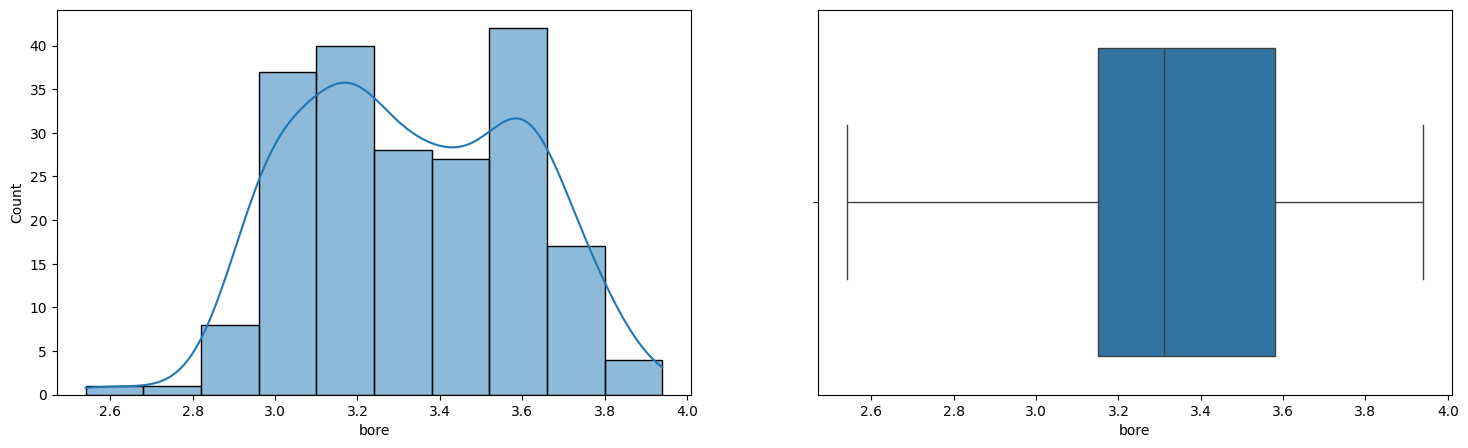

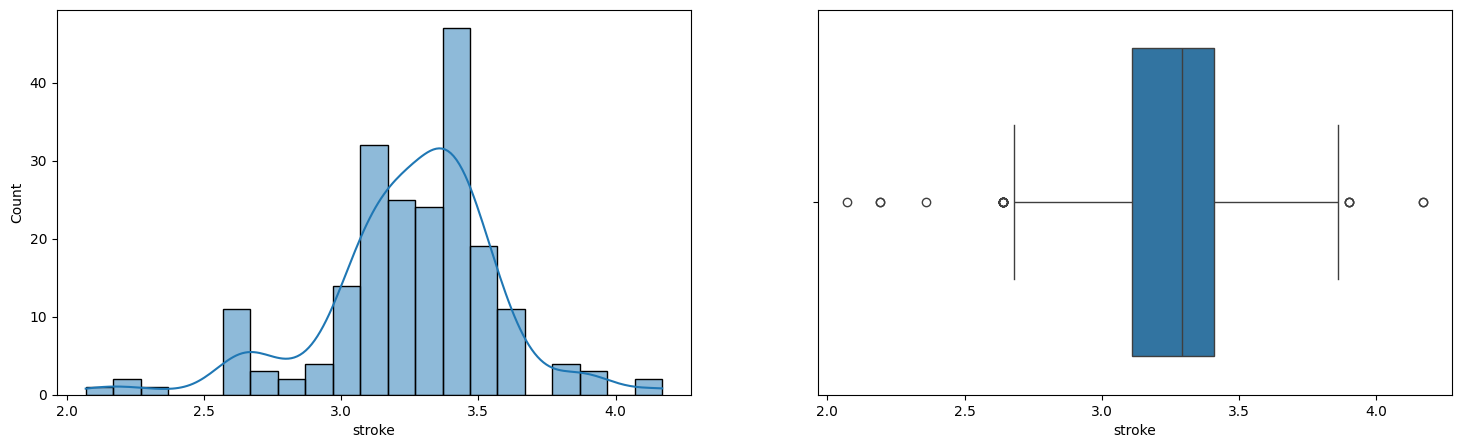

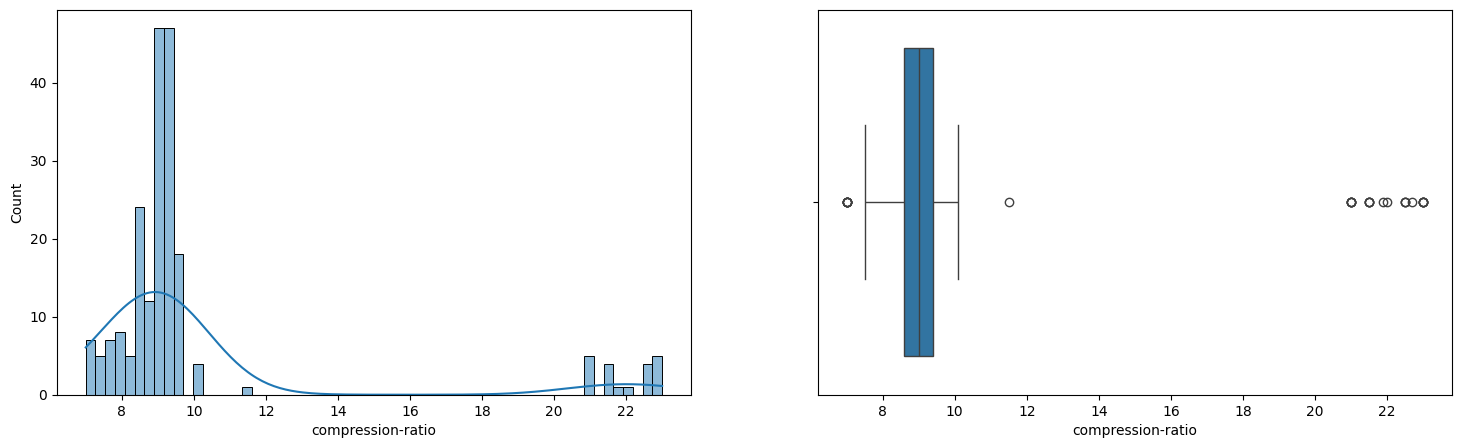

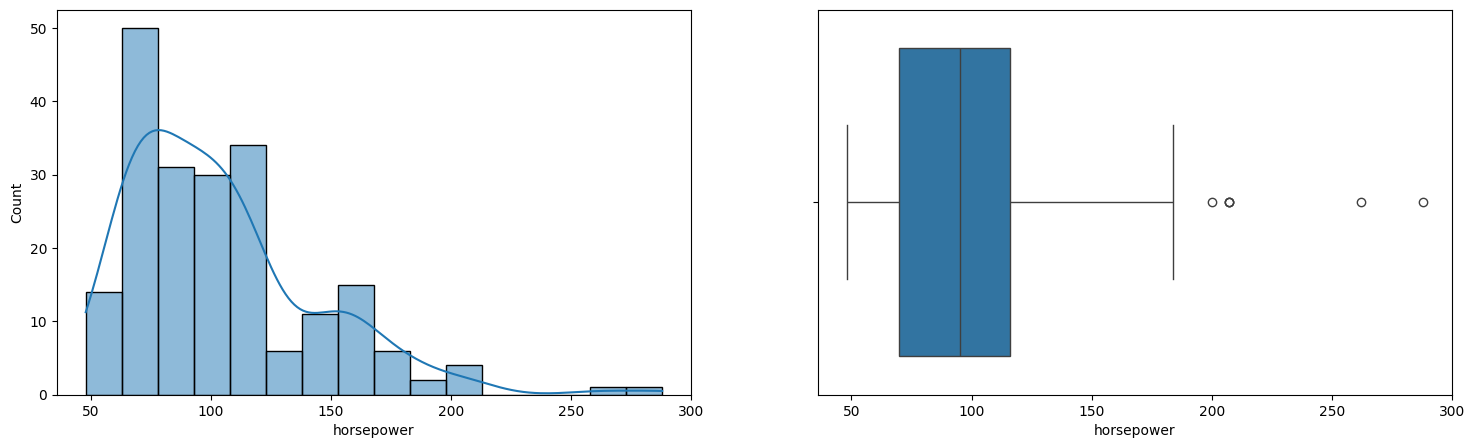

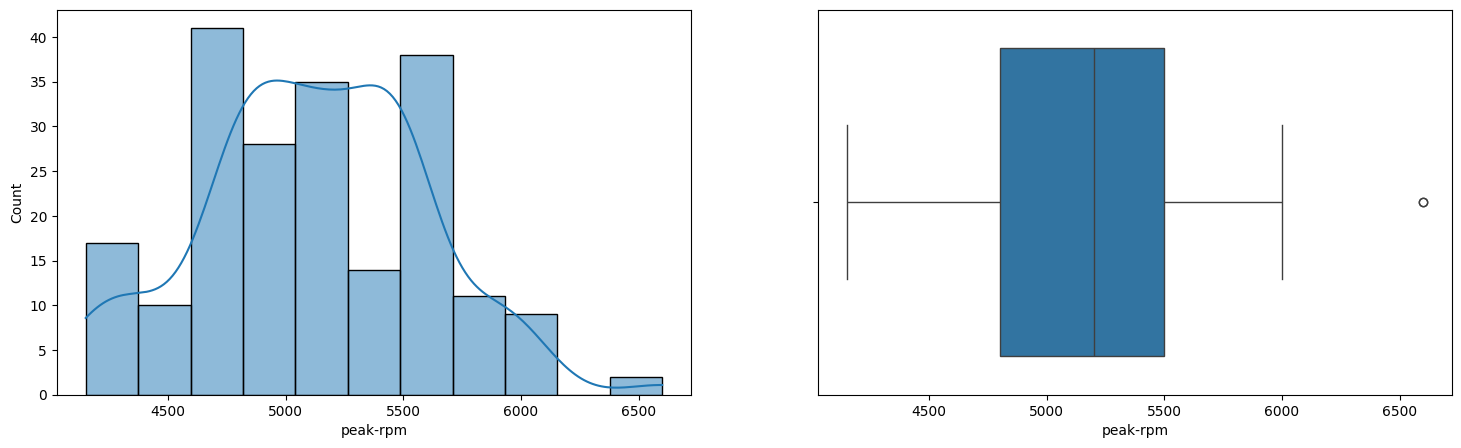

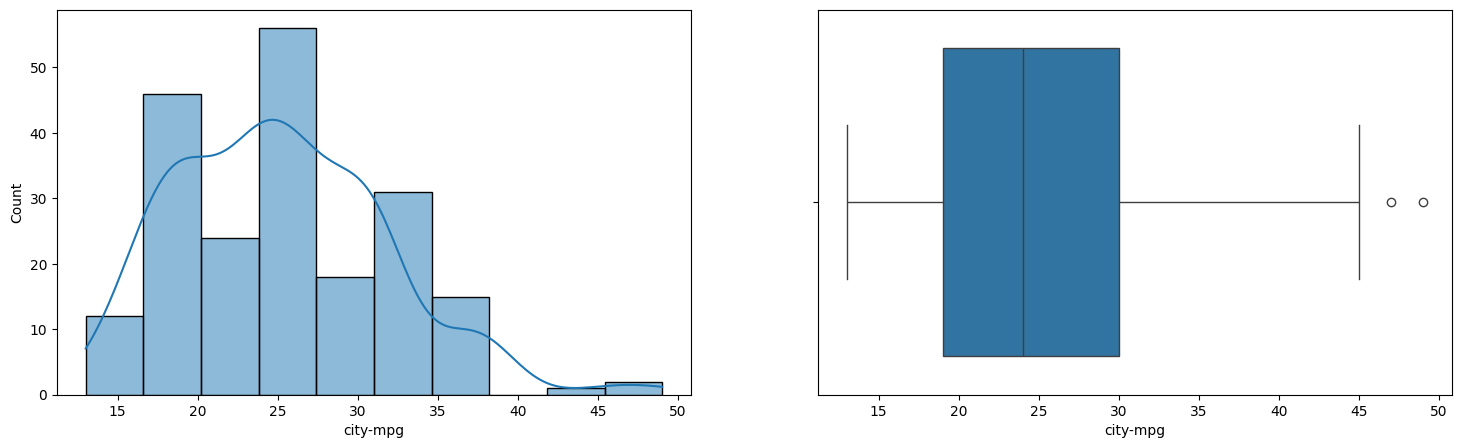

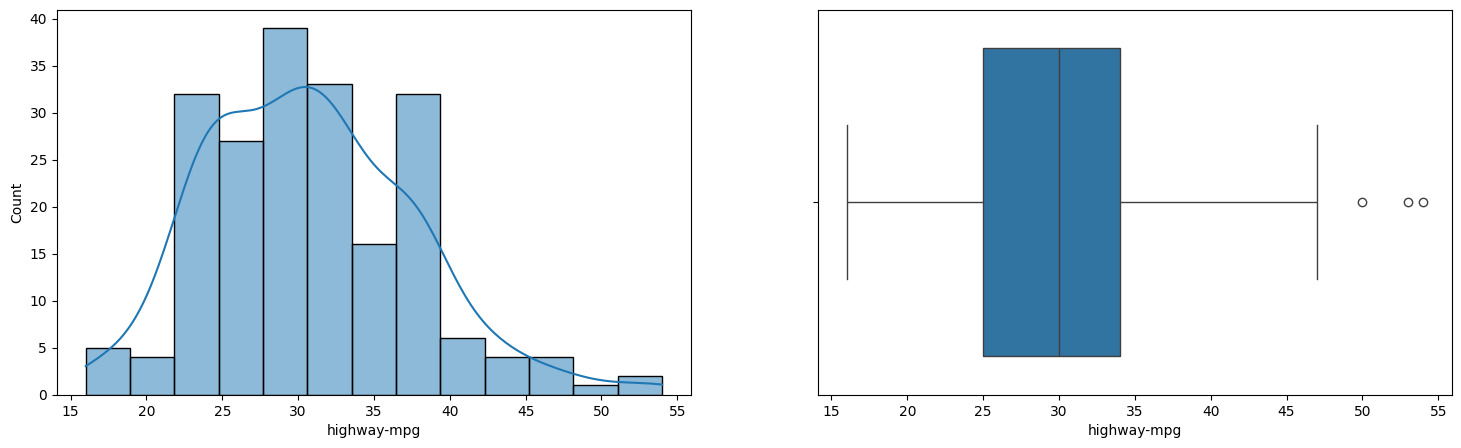

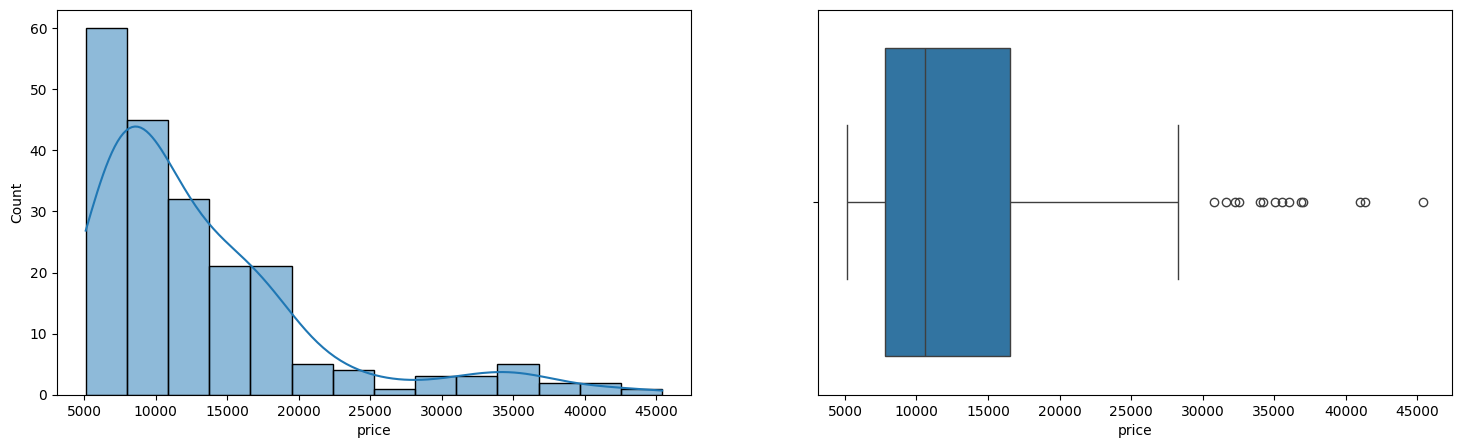

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

##### 4.1.1 - Analizing distributions on numerical variables - Spotting outliers

![Outliers](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png)

Assuming the data would follow a normal distribution, we can choose some of the graphs to examine the data in more detail:

<Figure size 800x1200 with 0 Axes>

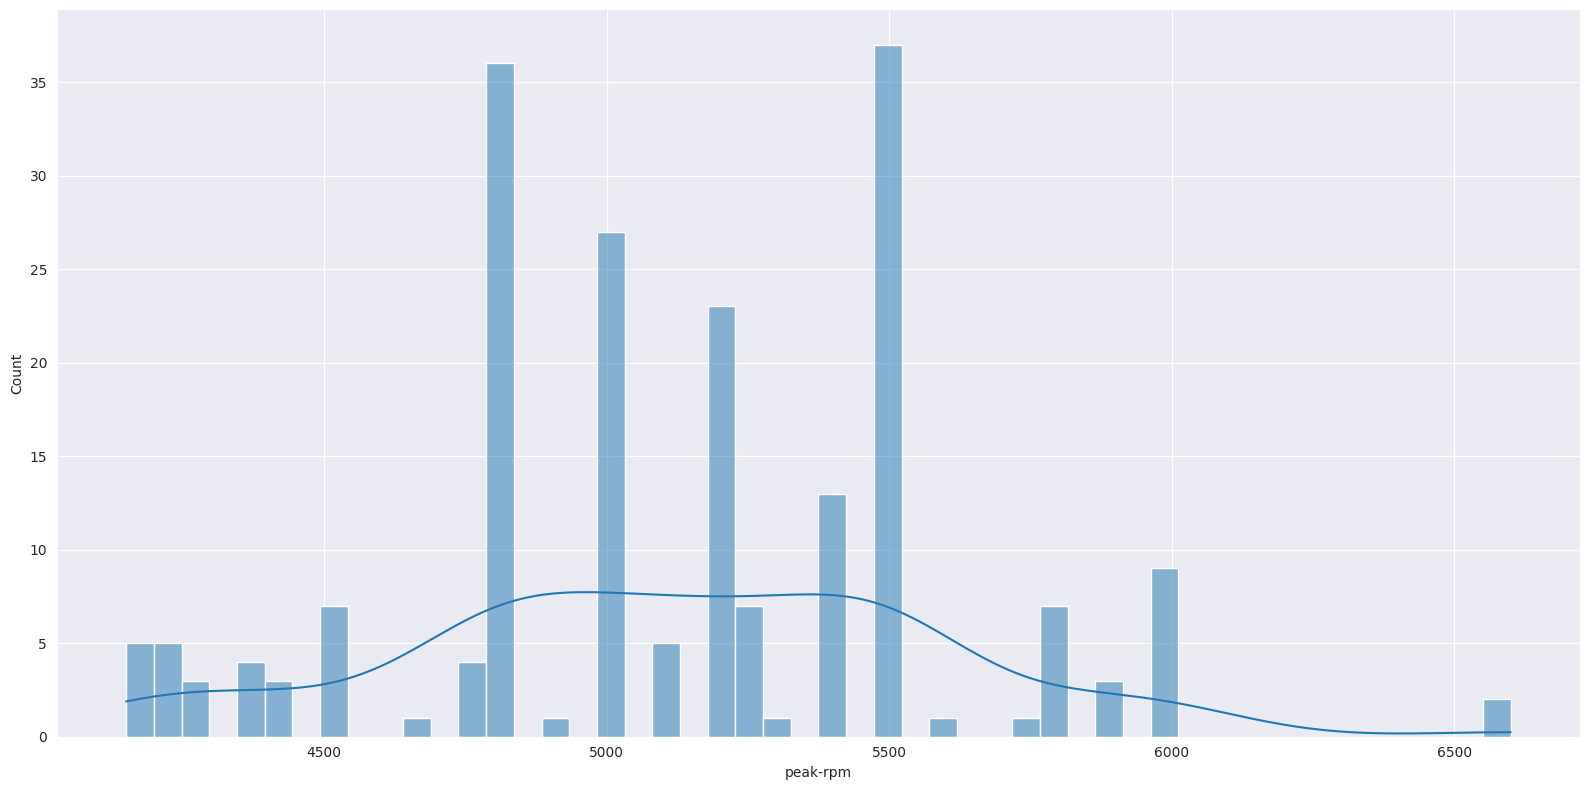

In [22]:
#set the style we wish to use for our plots
sns.set_style("darkgrid")

#plot the distribution of the DataFrame "Price" column
plt.figure(figsize=(8,12))
#sns.histplot(df['price'])
sns.displot(df['peak-rpm'], kde=True, bins=50, height=8, aspect=2)  

<Axes: xlabel='peak-rpm'>

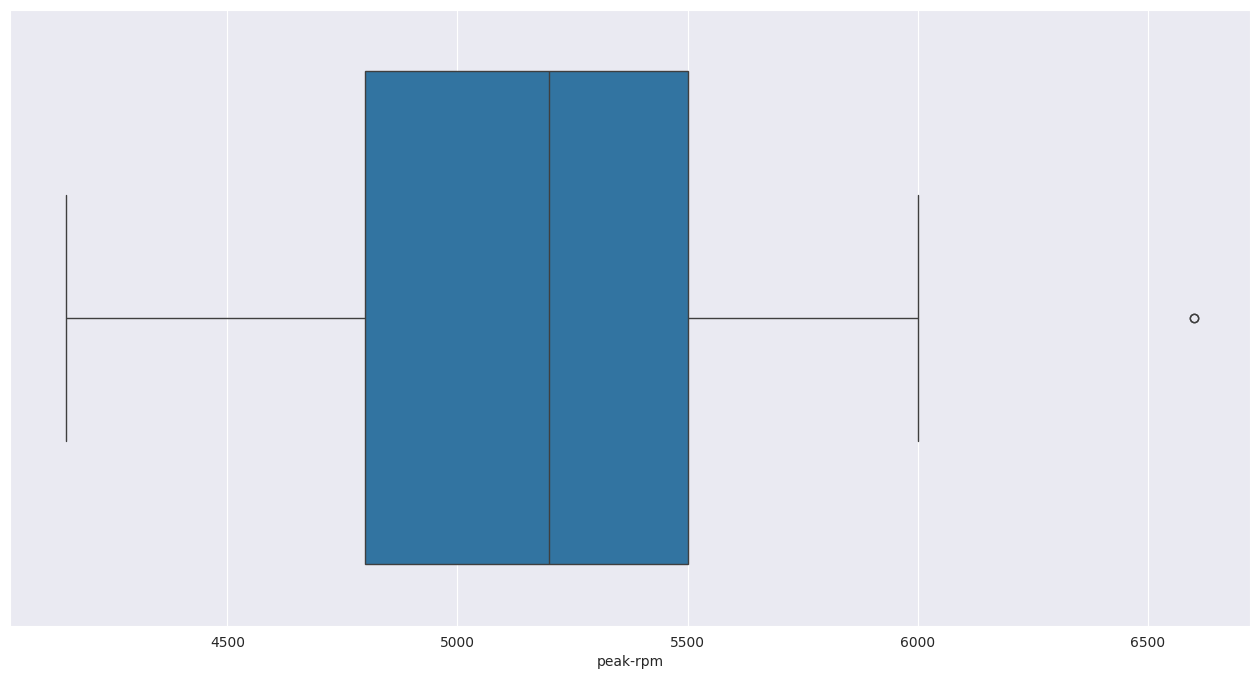

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="peak-rpm", data=df, ax=ax)

We will not treat outliers during Exploratory Data Analysis, but we will get back to them in the Data Preparation phase.

##### 4.1.2 - Analizing distributions on categorical variables

Although it is not one of the recommended plots, we can always use the pie plots in special situations:

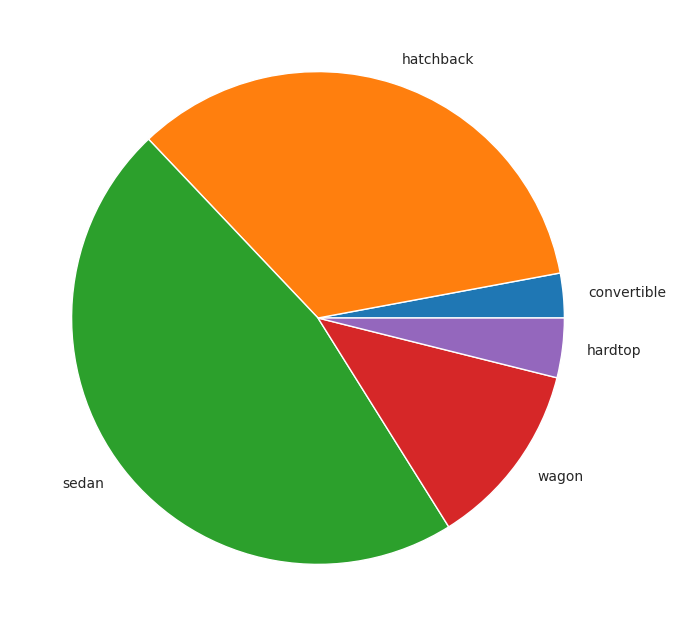

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(df["body-style"].value_counts(sort=False), labels=df["body-style"].unique())
plt.show()

[Barplots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html) with frequencies can be created in Matplotlib.

<Axes: xlabel='body-style'>

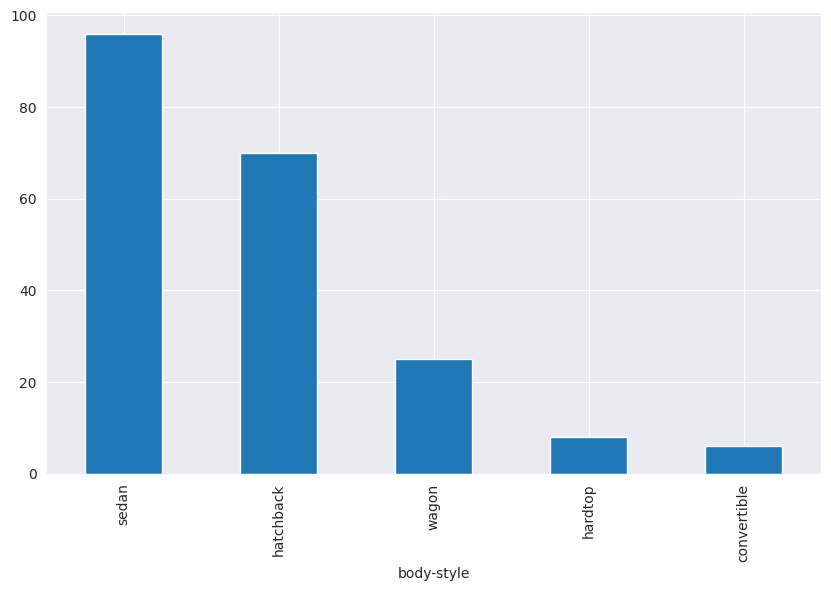

In [25]:
df["body-style"].value_counts().plot(kind="bar", figsize=(10,6))

There is no need to separately calculate the count when using the [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function

<Axes: xlabel='body-style', ylabel='count'>

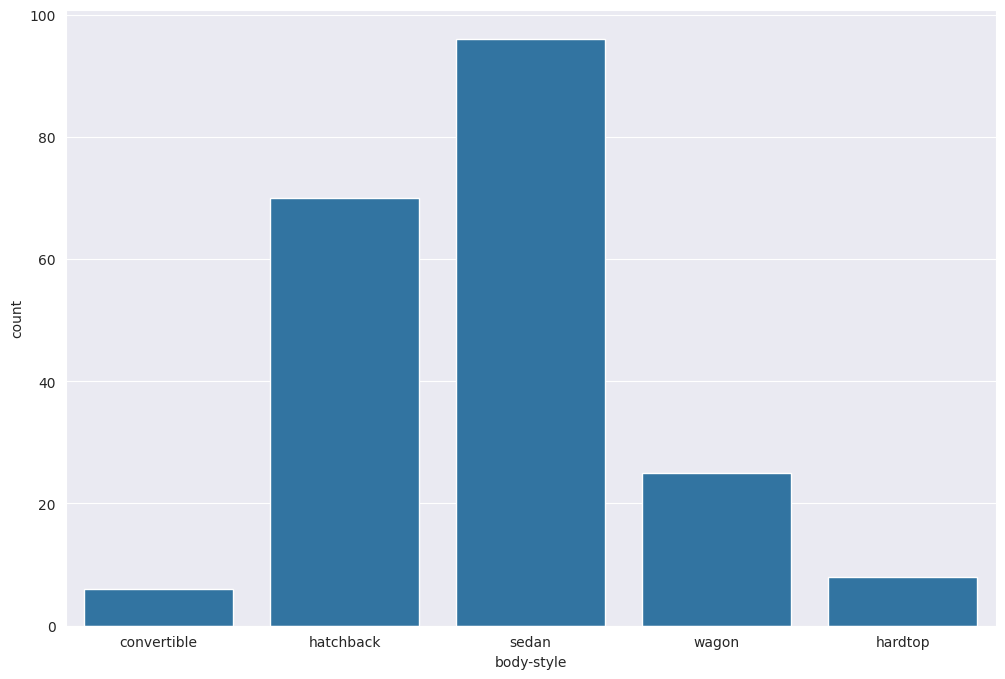

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.countplot(df["body-style"], ax=ax)
sns.countplot(df, x="body-style")

#### 4.2 Bivariate Analysis  

Now we want to check the relationships between pais of variables. We can start by drawing a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and a correlation plot.

<Figure size 1000x1000 with 0 Axes>

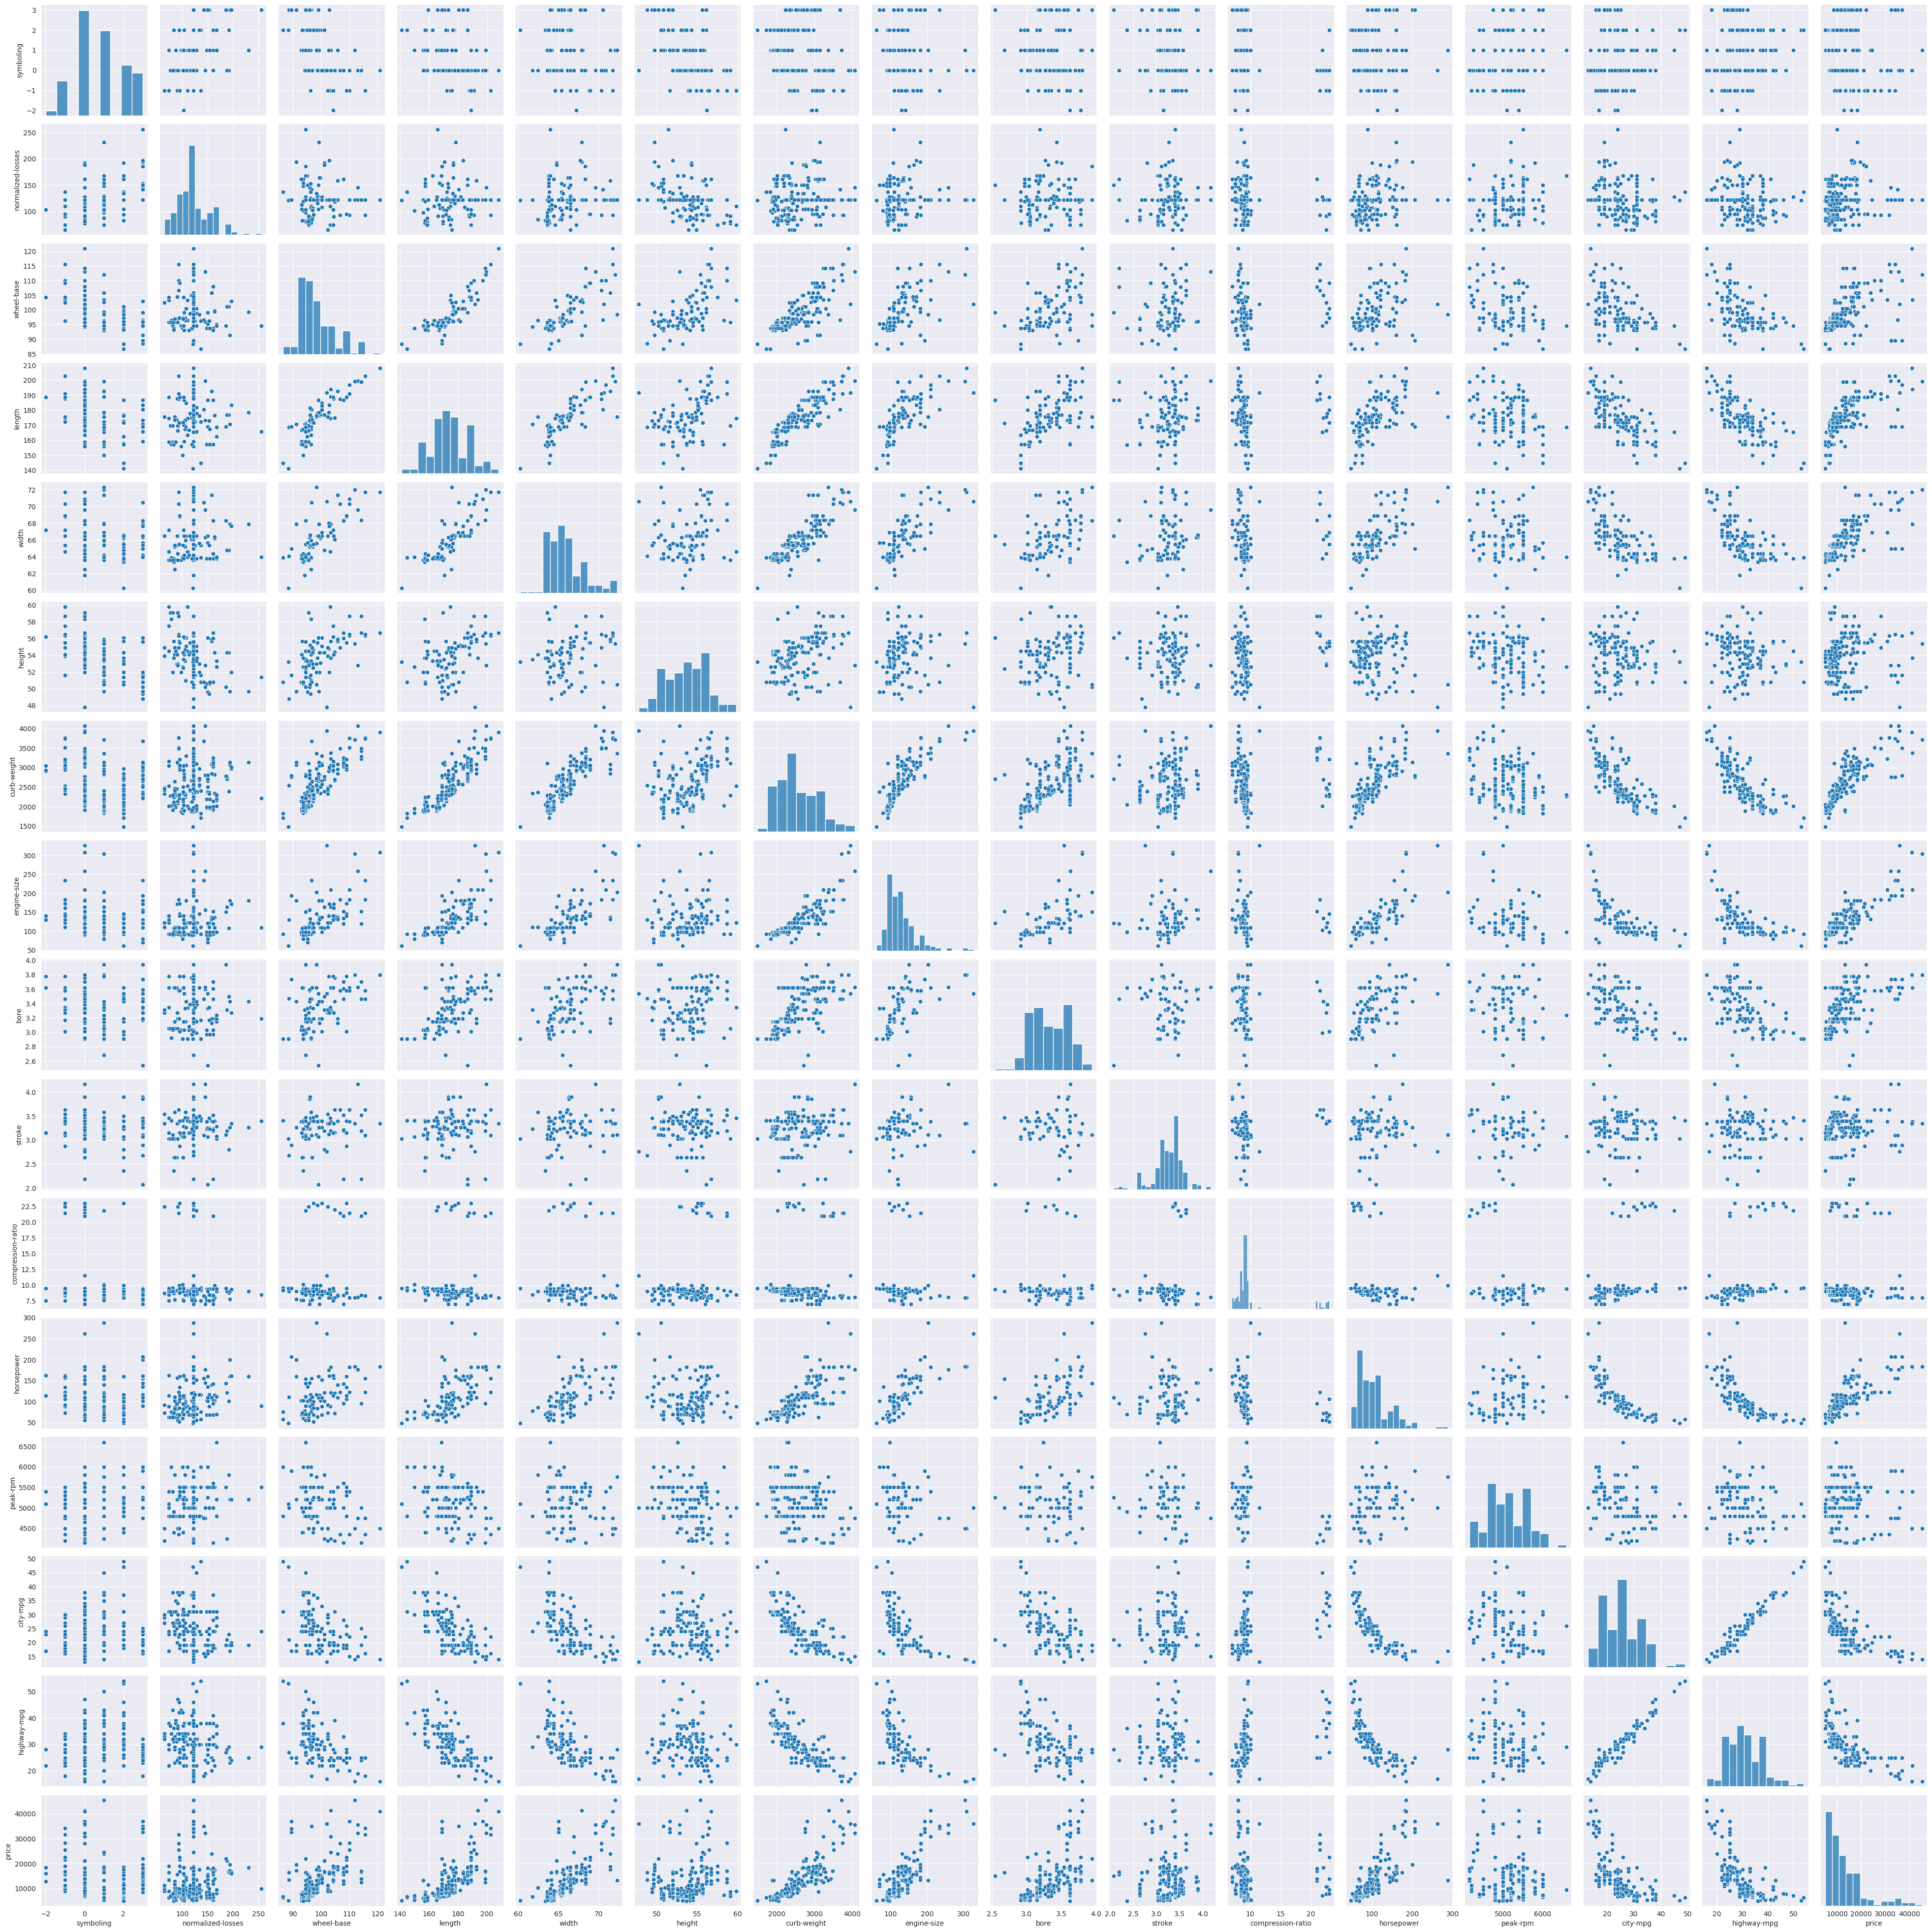

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'))

The pairplot can help us gaining quick insights on the correlations of variables, but can get cluttered if we have many features.  
We can also try the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlations:

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='vlag', vmin = -1, vmax = 1)

ValueError: could not convert string to float: 'alfa-romero'

<Figure size 1200x1200 with 0 Axes>

##### Positive Correlation  
+ 'Price' – 'wheel-base', 'length', 'width', 'curb_weight', 'engine-size', 'bore', 'horsepower'  
+ 'wheel-base' – 'length', 'width', 'height', 'curb_weight', 'engine-size', 'price'  
+ 'horsepower' – 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'price'  
+ 'Highway mpg' – 'city-mpg'  

##### Negative Correlation  
+ 'Price' – 'highway-mpg', 'city-mpg'  
+ 'highway-mpg' – 'wheel base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'price'  
+ 'city' – 'wheel base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'price'  

This heatmap has given us great insights into the data.  
Now let us apply domain knowledge and ask the questions which will affect the price of the automobile.

##### 4.2.1 - Checking some columns in more detail  
We can draw a vertical boxplot grouped by a categorical variable:

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="fuel-type", y="horsepower", data=df, ax=ax)

And even add a third component:  
https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
#sns.catplot(x="fuel-type", y="horsepower", hue="num-of-doors", kind="box", data=df, height=8, aspect=2)
sns.catplot(x="fuel-type", y="horsepower", hue="num-of-doors", kind="violin", inner="stick", split=True, palette="pastel", data=df, height=8, aspect=2)

### 5. Asking questions based on the analysis

Try to ask questions related to independent variables and the target variable.  
Example questions related to this dataset could be:  

+ How does 'fuel-type' affect the price of the car?   
+ How does the 'horsepower' affect the price?  
+ What is the relationship between 'engine-size' and 'price'?  
+ How does 'highway-mpg' affects 'price'?  
+ What is the relation between no. of doors and 'price'?

#### 5.1 How does 'fuel_type' will affect the price?  

Let's compare categorical data with numerical data. We are going to use a catplot from Seaborn, but there are other options for categorical variables:  
https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
plt.figure(figsize=(12,10))
#https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
sns.catplot(x='fuel-type',y='price', data=df, height=8)
plt.xlabel('Fuel Type')
plt.ylabel('Price')

#### 5.2 How does the horsepower affect the price?  

Matplotlib and Seaborn have very nice graphs to visualize numerical relationships:  
https://seaborn.pydata.org/tutorial/relational.html  
https://matplotlib.org/stable/gallery/index.html

In [ ]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='horsepower',y='price', data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price')

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.jointplot.html

sns.jointplot(x='horsepower',y='price', data=df)
sns.jointplot(x='horsepower',y='price', data=df, kind='hex')

We can see that most of the horsepower values lie between 50-150 with a price mostly between 5000-25000. There are outliers as well (between 200-300).  
Let’s see a count between 50-100 i.e univariate analysis of horsepower.

In [ ]:
plt.figure(figsize=(12,10))
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df.horsepower,bins=10)

The average count between 50-100 is 50 and it is positively skewed.

#### 5.3 What is the relation between engine-size and price?

In [ ]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='engine-size',y='price',data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')

In [ ]:
sns.jointplot(x='engine-size',y='price', data=df, kind='reg')
sns.jointplot(x='engine-size',y='price', data=df, kind='kde')

We can observe that the pattern is similar to horsepower vs price.

#### 5.4 How does highway_mpg affects price?

In [ ]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='highway-mpg',y='price',data=df)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

We can see price decreases with an increase in 'higway-mpg'.

#### 5.5 What is the relation between no. of doors and price?  

Let us first check the number of doors.

In [ ]:
# Unique values in num_of_doors
df["num-of-doors"].value_counts().plot(kind="bar", figsize=(10,6))

In [ ]:
plt.figure(figsize=(12,8))
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='price', y='num-of-doors',data=df)

With this boxplot we can conclude that the average price of a vehicle with two doors is 10000,  and the average price of a vehicle with four doors is close to 12000.  
With this plot, we have gained enough insights fromthe  data and our data is ready to build a model.

##### There are ways to explore relationships between more than two variables; although it can get a bit more complicated to interpret.

In [ ]:
# Create a pivot table for car manufactures and fuel with horsepower rate as values
grouped = pd.pivot_table(data=df,index='make',columns='fuel-type',values='horsepower',aggfunc='mean')

# Create a heatmap to visualize manufactures, fuel type and horse power
plt.figure(figsize=[12,10])
sns.heatmap(grouped, annot=True, cmap='coolwarm', center=0.117)

plt.title("Horse Power per Manufacturer")
plt.show()

## II - Feature Engineering and Selection

This will be developed in the next modules

## III - Modeling

This will be developed in the next modules

## IV - Evaluation

This will be developed in the next modules

# Your Turn!

#### Open the datasets available for the use cases and start the EDA.  
#### You will be able to make a better decision on which one to use and how to exploit them.

In [ ]:
bank_df = pd.read_csv("../../../3_artificial_use_case/1_Classification_RECOMMENDED/Bank_Dataset/bank-additional-full.csv", sep=";")
bank_df.head()

In [ ]:
happiness_df = pd.read_csv("../../../3_artificial_use_case/2_Regression_RECOMMENDED/Datasets/2015.csv")
happiness_df.head()

In [ ]:
# Your EDA...

# AutoEDA

Now we will introduce Automated Exploratory Data Analysis (AutoEDA). AutoEDA refers to the automated process of performing exploratory data analysis on a dataset without the need for manual intervention. One popular AutoEDA tool is [**Pandas Profiling**](https://docs.profiling.ydata.ai/latest/).

Pandas Profiling is an open-source library that generates detailed reports with descriptive statistics and visualizations for a given dataset. It offers a convenient way to quickly understand the structure and characteristics of the data, including:

* Summary statistics such as mean, median, mode, standard deviation, etc.
* Distribution of numerical and categorical variables.
* Correlation between variables.
* Missing values and their distribution.
* Interactive visualizations for data exploration.


Let's explore how to use Pandas Profiling for AutoEDA.

In [ ]:
#Import library
from ydata_profiling import ProfileReport

#Load the dataset we used in the first part of the notebook
df_auto = pd.read_csv('../../../Data/Automobile_data.csv')

#Generate the standart profiling report
profile = ProfileReport(df_auto, title="Profiling Report")

In [ ]:
profile

The **'Overview'** tab provides overall dataset statistics. 

The **'Alerts'** tab provides alerts related to the data quality checks, such as duplicate rows detection, constant and highly correlated variables identification, and low variance variables detection.

*For our dataset, what are most of the alerts about?*

The **'Reproduction'** tab indicates the analysis start and end times, along with the analysis duration, including the software version utilized.

In the section **'Variables'** you can choose the feature to get information on it. 

*Using this widget, identify how many distinct values 'engine-type' contains.*

In the next section **'Interactions'** you can choose two variables to see their scatterplot.

**'Correlation'** section provides a heatmap for all features and a correlation table. The darkest blue color means 100% positive correlation. 

*What features are highly correlated?*

Profiling report contain information on **missing values**. The generated visualization shows that we have no missing values. However, before we found out that missing values in our dataset are represented as question mark symbols. That's the point where we should be careful when using AutoEDA.


Try out Pandas Profiling with one of the use case datasets (`bank_df` or `happiness_df`)!

In [ ]:
# Write your code here:
# ...

As was demonstrated, Pandas Profiling simplifies the exploratory data analysis process by providing comprehensive insights and visualizations automatically. It is a valuable tool for understanding the characteristics and structure of a dataset, enabling data scientists and analysts to make informed decisions during the data analysis workflow.